In [9]:
from numpy import mean, cov, cumsum, dot, linalg, size, flipud, real 
import cv2 as cv
from matplotlib import pyplot as plt

class PrincipleComponets():
    def __init__(self, num_of_pc, image_matrix):
        self.num_of_pc = num_of_pc
        self.image_matrix = image_matrix
    
    def pc(self, image_matrix):
        """
        Computing eigenvalues and eigenvectors of covariance matrix
        """
        # subtract the mean (along columns)
        M = (image_matrix - mean(image_matrix.T, axis = 1)).T 
        [latent, coeff] = linalg.eig(cov(M))

        p = size(coeff, axis = 1)
        # sorting the eigenvalues in ascending order
        idx = latent.argsort() 
        idx = idx[::-1]       
        # sorting eigenvectors according to the sorted eigenvalues
        coeff = coeff[:, idx]
        latent = latent[idx] 
        # sorting eigenvalues
        if self.num_of_pc < p and self.num_of_pc >= 0:
            # cutting some PCs if needed
            coeff = coeff[:, range(self.num_of_pc)] 
        # projection of the data in the new space
        score = dot(coeff.T, M) 

        return coeff, score, latent

    def fit(self):
        """
        Applying pc algorythm to an image
        """
         # to get a 2-D array
        image_matrix = mean(self.image_matrix, 2)
        # numbers of all the principal components
        full_pc = size(image_matrix, axis = 1) 
        coeff, score, latent = self.pc(image_matrix)
        
        # image reconstruction
        reconstructed_image_matrix = dot(coeff, score).T + mean(image_matrix, axis = 0)
        return real(reconstructed_image_matrix)
  

        


[[ 0.01065656+0.j -0.00982009+0.j -0.0013628 +0.j ...  0.01414428+0.j
  -0.02169054+0.j  0.00060561+0.j]
 [ 0.01062746+0.j -0.00970923+0.j -0.00141284+0.j ...  0.01387881+0.j
  -0.02152355+0.j  0.00098268+0.j]
 [ 0.01060982+0.j -0.0096642 +0.j -0.00144794+0.j ...  0.01387811+0.j
  -0.02140217+0.j  0.00118362+0.j]
 ...
 [ 0.00353785+0.j -0.00278408+0.j  0.00019741+0.j ... -0.0036046 +0.j
   0.00314325+0.j -0.0050711 +0.j]
 [ 0.00353356+0.j -0.00278326+0.j  0.00019257+0.j ... -0.0036081 +0.j
   0.00315082+0.j -0.00504123+0.j]
 [ 0.00353785+0.j -0.00278408+0.j  0.00019741+0.j ... -0.0036046 +0.j
   0.00314325+0.j -0.0050711 +0.j]] [[-1.11421964e+03+0.j -1.11421964e+03+0.j -1.11421964e+03+0.j ...
  -1.46452259e+03+0.j -1.46859967e+03+0.j -1.46793812e+03+0.j]
 [ 6.17963442e+02+0.j  6.17963442e+02+0.j  6.17963442e+02+0.j ...
   4.58639402e+02+0.j  4.47382858e+02+0.j  4.47468313e+02+0.j]
 [ 1.04506403e+02+0.j  1.04506403e+02+0.j  1.04506403e+02+0.j ...
   6.19468069e+01+0.j  5.94532292e+01+0.

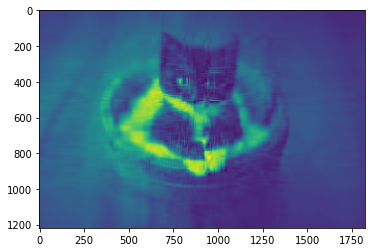

In [10]:
img = cv.imread('Beata-Miro.jpg') 
new_img = PrincipleComponets(15, img)

my_img = new_img.fit()
plt.imshow(my_img)
plt.show() 